In [11]:
import numpy as np
import matplotlib.pyplot as plt

# To do
* import data for N_m=20 and N_m=30.

In [3]:
N_m_v_list=[20,25,30]
N_m_theta_list=[20,25,30]
Obs_linear=0
N_t=4000
m=80
sigma_kernel=2000
gamma_ratio=0.0001*5

t_yr=365*24*3600
version=2024.11
number=102


In [20]:
N_m_v_1 = 20
N_m_v_2 = 30


In [8]:
index=2
N_m_v=N_m_v_2
N_m_theta=N_m_v_2
data_30=np.load("/central/groups/astuart/hkaveh/Data/LearnROM/EnKF_N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"Obs_linear"+str(Obs_linear)+"N_t"+str(N_t)+"m"+str(m)+"sigma_kernel"+str(sigma_kernel)+"gamma_ratio"+str(gamma_ratio)+"version"+str(version)+"NumberinDataset"+str(number)+'.npz')

alpha_a_30=data_30['alpha_a']
alpha_f_30=data_30['alpha_f']
Innovations_30=data_30['Innovations']
time_30=data_30['time']
y_obs_30=data_30['y_obs']
X_uniform_30=data_30['X_uniform']
t_0_inversion_30=data_30['t_0']
theta_data_30=X_uniform_30[:,N_m_v:].T
end_time_30=time_30[-1]/t_yr



In [14]:
# It is very easy. Find the l^2 norm between the true signal in the average EnkF signal and save it.
alpha_a_mean_30=np.mean(alpha_a_30,axis=1)
alpha_a_mean_v_30=alpha_a_mean_30[:N_m_v_2,:] # mean ensemble member for v
alpha_a_mean_theta_30=alpha_a_mean_30[N_m_v_2:,:] # mean ensemble member for theta

true_v_30=X_uniform_30[:N_t,:N_m_v_2].T
true_theta_30=X_uniform_30[:N_t,N_m_v_2:].T
obs_v_30 = y_obs_30[:,:N_t]
error_estimate_v_30 =alpha_a_mean_v_30-true_v_30
error_obs_30  =obs_v_30-true_v_30
error_estimate_theta_30 =alpha_a_mean_theta_30-true_theta_30
l2_norm_estimate_v_30=np.linalg.norm(error_estimate_v_30,axis=0) # l2 norm of the estimation error
l2_norm_obs_30=np.linalg.norm(error_obs_30,axis=0) # l2 norm of the observation error
l2_norm_estimate_theta_30=np.linalg.norm(error_estimate_theta_30,axis=0) # l2 norm of the estimation error

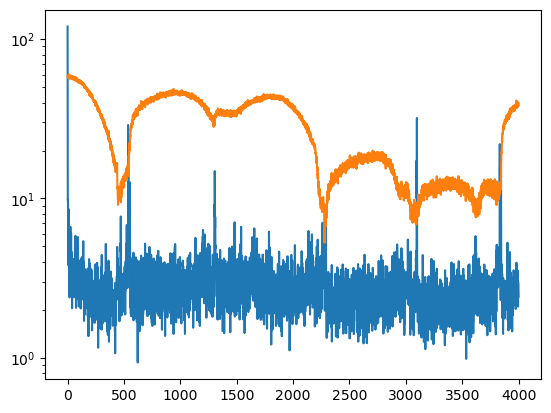

In [15]:
plt.plot(l2_norm_estimate_v_30,label='estimate error v')
plt.plot(l2_norm_obs_30,label='obs error v')
plt.yscale('log')

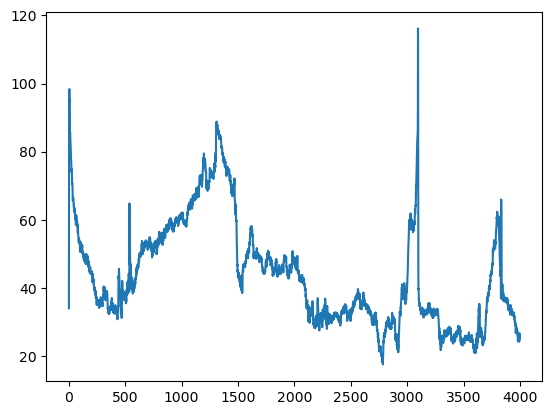

In [16]:
plt.plot(l2_norm_estimate_theta_30,label='estimate error theta')

In [22]:
N_m_v=N_m_v_1
N_m_theta=N_m_v_1
data_20=np.load("/central/groups/astuart/hkaveh/Data/LearnROM/EnKF_N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"Obs_linear"+str(Obs_linear)+"N_t"+str(N_t)+"m"+str(m)+"sigma_kernel"+str(sigma_kernel)+"gamma_ratio"+str(gamma_ratio)+"version"+str(version)+"NumberinDataset"+str(number)+'.npz')

alpha_a_20=data_20['alpha_a']
alpha_f_20=data_20['alpha_f']
Innovations_20=data_20['Innovations']
time_20=data_20['time']
y_obs_20=data_20['y_obs']
X_uniform_20=data_20['X_uniform']
t_0_inversion_20=data_20['t_0']
theta_data_20=X_uniform_20[:,N_m_v:].T
end_time_20=time_20[-1]/t_yr

In [38]:
alpha_a_mean_20=np.mean(alpha_a_20,axis=1)
alpha_a_mean_v_20=alpha_a_mean_20[:N_m_v_1,:] # mean ensemble member for v
alpha_a_mean_theta_20=alpha_a_mean_20[N_m_v_1:,:] # mean ensemble member for theta
# # to be able to compare the two cases we append 10 zeros to the end of the alpha_a_mean_v_20 and alpha_a_mean_theta_20
# alpha_a_mean_v_20_augmented=np.append(alpha_a_mean_v_20,np.zeros((10,N_t)),axis=0)
# alpha_a_mean_theta_20_augmented=np.append(alpha_a_mean_theta_20,np.zeros((10,N_t)),axis=0)
# now that we have the same size we can compare the two cases
true_v_20=X_uniform_20[:N_t,:N_m_v_1].T
true_theta_20=X_uniform_20[:N_t,N_m_v_1:].T
error_estimate_v_20 =alpha_a_mean_v_20-true_v_20
error_estimate_theta_20 =alpha_a_mean_theta_20-true_theta_20
l2_norm_estimate_v_20=np.linalg.norm(error_estimate_v_20,axis=0) # l2 norm of the estimation error
l2_norm_estimate_theta_20=np.linalg.norm(error_estimate_theta_20,axis=0) # l2 norm of the estimation error

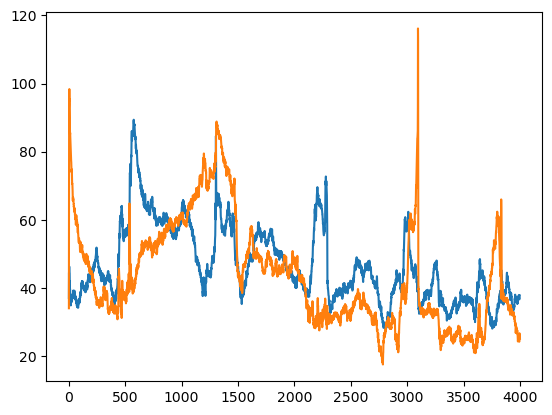

In [39]:
plt.plot(l2_norm_estimate_theta_20)
plt.plot(l2_norm_estimate_theta_30)

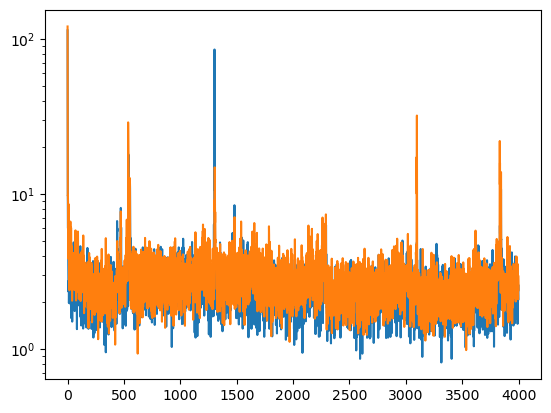

In [41]:
plt.plot(l2_norm_estimate_v_20)
plt.plot(l2_norm_estimate_v_30)
plt.yscale('log')   